In [1]:
##Importing data

In [2]:
import pandas as pd

data = pd.read_csv('mrip_catch_snapshot.csv', header=0)
print(data.head())

  Estimate Status  Year         Wave Fishing Mode Fishing Area  \
0           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
1           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
2           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
3           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
4           FINAL  2010  MARCH/APRIL        SHORE       INLAND   

          Species Group             Sub Group  Observed Harvest (A)   PSE  \
0  CARTILAGINOUS FISHES           SKATES/RAYS                     0     .   
1             CATFISHES  FRESHWATER CATFISHES                 35600  63.5   
2          OTHER FISHES          OTHER FISHES                 53567  60.7   
3      TEMPERATE BASSES          STRIPED BASS                     0     .   
4      TEMPERATE BASSES           WHITE PERCH               1313617  60.8   

   Reported Harvest (B1) PSE.1  Released Alive (B2)  PSE.2  
0                      0     .                10143  105.8  
1                 

In [3]:
catch_effort = pd.read_csv('mrip_effort_series.csv', header=0)
print(catch_effort.head())

  Estimate Status  Year         Wave  Fishing Mode     Fishing Area  \
0           FINAL  2010  MARCH/APRIL         SHORE  OCEAN (<= 3 MI)   
1           FINAL  2010  MARCH/APRIL         SHORE           INLAND   
2           FINAL  2010  MARCH/APRIL    PARTY BOAT   OCEAN (> 3 MI)   
3           FINAL  2010  MARCH/APRIL    PARTY BOAT           INLAND   
4           FINAL  2010  MARCH/APRIL  CHARTER BOAT   OCEAN (> 3 MI)   

   Angler Trips    PSE  
0          4436  109.6  
1        730139   19.1  
2           788    8.6  
3             2    8.6  
4             7   17.3  


In [4]:
df = pd.merge(data, catch_effort, how='left', on=['Year', 'Wave', 'Fishing Mode', 'Fishing Area'])
df

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,Species Group,Sub Group,Observed Harvest (A),PSE_x,Reported Harvest (B1),PSE.1,Released Alive (B2),PSE.2,Estimate Status_y,Angler Trips,PSE_y
0,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,FINAL,730139,19.1
1,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,FINAL,730139,19.1
2,FINAL,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,FINAL,730139,19.1
3,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,FINAL,730139,19.1
4,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,FINAL,730139,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,OTHER FISHES,OTHER FISHES,14682,57.5,0,.,298869,18.8,FINAL,225163,21.8
2844,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,STRIPED BASS,87647,35.1,31024,38.9,449166,28.8,FINAL,225163,21.8
2845,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,WHITE PERCH,30297,64.3,31248,82.7,95671,45.6,FINAL,225163,21.8
2846,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TOADFISHES,TOADFISHES,0,.,0,.,763,69.7,FINAL,225163,21.8


In [5]:
df.rename(columns = {'Observed Harvest (A)':'A', 'Reported Harvest (B1)':'B1', 'Released Alive (B2)':'B2'}, inplace = True) 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estimate Status_x  2848 non-null   object
 1   Year               2848 non-null   int64 
 2   Wave               2848 non-null   object
 3   Fishing Mode       2848 non-null   object
 4   Fishing Area       2848 non-null   object
 5   Species Group      2848 non-null   object
 6   Sub Group          2848 non-null   object
 7   A                  2848 non-null   int64 
 8   PSE_x              2848 non-null   object
 9   B1                 2848 non-null   int64 
 10  PSE.1              2848 non-null   object
 11  B2                 2848 non-null   int64 
 12  PSE.2              2848 non-null   object
 13  Estimate Status_y  2848 non-null   object
 14  Angler Trips       2848 non-null   int64 
 15  PSE_y              2848 non-null   object
dtypes: int64(5), object(11)
memory usage: 378.

In [7]:
## Eploring data...

#Columns: Year - Year
#    Wave - 2 month period 
#   Fishing Mode - where fishing took place (from shore or type of boat)
#   Fishing Area - inland (but not freshwater), near-shore (within 3 miles of shore), and off-shore (over 3 miles from shore)
#   Species Group - Type of fish
#   Subgroup - More specific description of fish
#   A - Observed Harvest - NOAA official observed
#   PSE - Percent standard error. Error over 50 indicates a pretty unreliable number
#   B1 - Reported Harvest - Fisher reported but was not observed by NOAA
#   B2 - Released Alive - fish were caught and released
#   Angler Trips - number of trips reported to NOAA 
#   PSE_y - Percent standard error in angler trip number

In [8]:
df['total'] = df.A + df.B1 + df.B2
#Total - Observed Harvest + Reported Harvest + Released Alive
df

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,Species Group,Sub Group,A,PSE_x,B1,PSE.1,B2,PSE.2,Estimate Status_y,Angler Trips,PSE_y,total
0,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,FINAL,730139,19.1,10143
1,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,FINAL,730139,19.1,96256
2,FINAL,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,FINAL,730139,19.1,337713
3,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,FINAL,730139,19.1,714968
4,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,FINAL,730139,19.1,2616125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,OTHER FISHES,OTHER FISHES,14682,57.5,0,.,298869,18.8,FINAL,225163,21.8,313551
2844,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,STRIPED BASS,87647,35.1,31024,38.9,449166,28.8,FINAL,225163,21.8,567837
2845,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,WHITE PERCH,30297,64.3,31248,82.7,95671,45.6,FINAL,225163,21.8,157216
2846,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TOADFISHES,TOADFISHES,0,.,0,.,763,69.7,FINAL,225163,21.8,763


In [9]:
df.drop(columns=['Estimate Status_x', 'Estimate Status_y'])
#dropping columns with no use

,Year,Wave,Fishing Mode,Fishing Area,Species Group,Sub Group,A,PSE_x,B1,PSE.1,B2,PSE.2,Angler Trips,PSE_y,total
0,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,730139,19.1,10143
1,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,730139,19.1,96256
2,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,730139,19.1,337713
3,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,730139,19.1,714968
4,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,730139,19.1,2616125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,OTHER FISHES,OTHER FISHES,14682,57.5,0,.,298869,18.8,225163,21.8,313551
2844,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,STRIPED BASS,87647,35.1,31024,38.9,449166,28.8,225163,21.8,567837
2845,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,WHITE PERCH,30297,64.3,31248,82.7,95671,45.6,225163,21.8,157216
2846,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TOADFISHES,TOADFISHES,0,.,0,.,763,69.7,225163,21.8,763


In [10]:
#average number of each fish caught
print(df.groupby(['Species Group', 'Year'])[['total']].mean())


                           total
Species Group Year              
BLUEFISH      2010  59604.181818
              2011  93045.526316
              2012  54356.875000
              2013  60151.000000
              2014  59101.666667
...                          ...
WRASSES       2015  35006.750000
              2016  44502.083333
              2017  48778.062500
              2018  19446.750000
              2019  55602.846154

[202 rows x 1 columns]


In [11]:
means = df.groupby(['Fishing Mode', 'Species Group'])['total'].mean()
means



Fishing Mode  Species Group           
CHARTER BOAT  BLUEFISH                     13404.000000
              CARTILAGINOUS FISHES          1495.862069
              CATFISHES                     1595.111111
              CODS AND HAKES                 755.500000
              DOLPHINS                      2377.312500
                                              ...      
SHORE         SEAROBINS                    53920.800000
              TEMPERATE BASSES            743163.018349
              TOADFISHES                   42617.208333
              TRIGGERFISHES/FILEFISHES     18578.000000
              WRASSES                     110915.551724
Name: total, Length: 81, dtype: float64

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

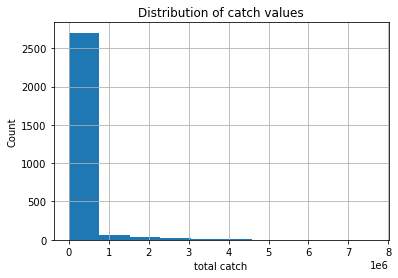

In [13]:
df.total.hist(bins = 10)
plt.xlabel('total catch')
plt.ylabel('Count')
plt.title('Distribution of catch values');

In [14]:
df.total.describe()

count    2.848000e+03
mean     1.599457e+05
std      5.131743e+05
min      0.000000e+00
25%      5.690000e+02
50%      6.299500e+03
75%      6.777200e+04
max      7.622662e+06
Name: total, dtype: float64

In [15]:
df['Fishing Area'].unique()

array(['INLAND', 'OCEAN (> 3 MI)', 'OCEAN (<= 3 MI)'], dtype=object)

In [16]:
df['Species Group'].unique()

array(['CARTILAGINOUS FISHES', 'CATFISHES', 'OTHER FISHES',
       'TEMPERATE BASSES', 'CODS AND HAKES', 'EELS', 'SEA BASSES',
       'WRASSES', 'FLOUNDERS', 'HERRINGS', 'BLUEFISH', 'PUFFERS', 'DRUMS',
       'TOADFISHES', 'SEAROBINS', 'DOLPHINS', 'TUNAS AND MACKERELS',
       'JACKS', 'PORGIES', 'TRIGGERFISHES/FILEFISHES', 'GRUNTS',
       'SCULPINS'], dtype=object)

In [17]:
df['Sub Group'].unique()

array(['SKATES/RAYS', 'FRESHWATER CATFISHES', 'OTHER FISHES',
       'STRIPED BASS', 'WHITE PERCH', 'ATLANTIC COD', 'EELS',
       'BLACK SEA BASS', 'CUNNER', 'TAUTOG', 'SUMMER FLOUNDER',
       'HERRINGS', 'BLUEFISH', 'DOGFISH SHARKS', 'OTHER SHARKS',
       'PUFFERS', 'ATLANTIC CROAKER', 'SPOT', 'TOADFISHES', 'SEAROBINS',
       'DOLPHINS', 'OTHER TUNAS/MACKERELS', 'KINGFISHES', 'WEAKFISH',
       'RED HAKE', 'GREATER AMBERJACK', 'SPANISH MACKEREL', 'BLACK DRUM',
       'RED DRUM', 'SHEEPSHEAD', 'SCUP', 'TRIGGERFISHES/FILEFISHES',
       'LITTLE TUNNY/ATLANTIC BONITO', 'SPOTTED SEATROUT', 'PIGFISH',
       'ATLANTIC MACKEREL', 'SILVER PERCH', 'OTHER CODS/HAKES', 'POLLOCK',
       'OTHER FLOUNDERS', 'PINFISHES', 'SCULPINS', 'EPINEPHELUS GROUPERS',
       'OTHER SEA BASSES', 'OTHER PORGIES', 'MYCTEROPERCA GROUPERS',
       'SOUTHERN FLOUNDER', 'OTHER TEMPERATE BASSES', 'OTHER JACKS',
       'WINTER FLOUNDER', 'OTHER DRUM', 'KING MACKEREL',
       'FLORIDA POMPANO', 'OTHER GRUNTS'], dty

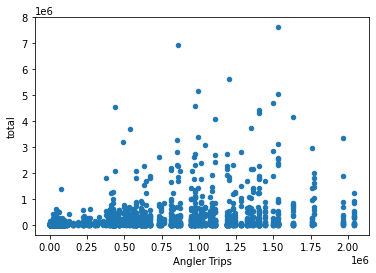

In [18]:
df.plot(x='Angler Trips', y='total', kind='scatter');

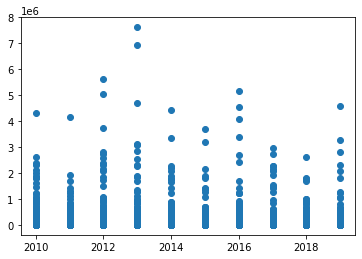

In [19]:
plt.scatter(df.Year, df.total)

In [51]:
df.rename(columns={"Species Group": "SpecGroup", "Sub Group": "SubGroup"}, inplace=True)

In [41]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Estimate Status_x,0,0.0
Angler Trips,0,0.0
Estimate Status_y,0,0.0
PSE.2,0,0.0
B2,0,0.0
PSE.1,0,0.0
B1,0,0.0
PSE_y,0,0.0
PSE_x,0,0.0
Sub Group,0,0.0


In [53]:
df[df['SpecGroup'] == 'Drums']

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,A,PSE_x,B1,PSE.1,B2,PSE.2,Estimate Status_y,Angler Trips,PSE_y,total


In [52]:
df['SpecGroup'].value_counts()

DRUMS                       529
TEMPERATE BASSES            348
CARTILAGINOUS FISHES        272
FLOUNDERS                   219
SEA BASSES                  190
BLUEFISH                    185
OTHER FISHES                156
WRASSES                     125
TUNAS AND MACKERELS         109
CATFISHES                   105
SEAROBINS                   103
TOADFISHES                  100
EELS                         67
PUFFERS                      66
HERRINGS                     65
CODS AND HAKES               55
PORGIES                      54
DOLPHINS                     40
TRIGGERFISHES/FILEFISHES     32
GRUNTS                       14
JACKS                        13
SCULPINS                      1
Name: SpecGroup, dtype: int64

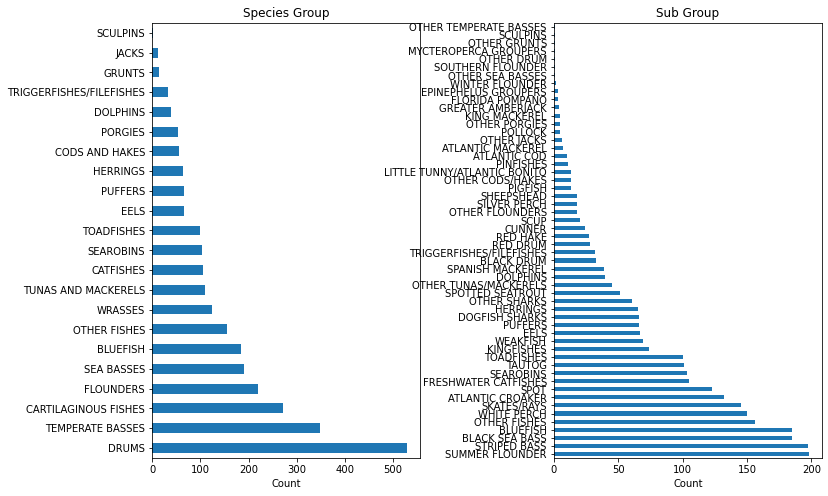

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.SpecGroup.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Species Group')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.SubGroup.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('Sub Group')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);


In [61]:
means2 = df.groupby(['Fishing Area', 'SpecGroup'])['total'].mean()
means2


Fishing Area     SpecGroup               
INLAND           BLUEFISH                     70509.500000
                 CARTILAGINOUS FISHES         10145.724409
                 CATFISHES                   290240.057143
                 CODS AND HAKES                2639.875000
                 DOLPHINS                      7981.000000
                 DRUMS                       210323.600000
                 EELS                         12438.577778
                 FLOUNDERS                   102249.651515
                 GRUNTS                         797.000000
                 HERRINGS                    105533.295082
                 JACKS                         1781.333333
                 OTHER FISHES                279611.218487
                 PORGIES                       2561.619048
                 PUFFERS                      17616.733333
                 SEA BASSES                   87580.950000
                 SEAROBINS                    15593.550000
              